# 프로젝트 개요

concrete_data.csv를 사용하여 콘크리트의 압축 강도를 예측하는 모델을 개발합니다.

스스로 데이터 불러오기, 데이터 확인, 데이터 전처리, EDA, 모델링, 성능측정을 진행하며 최공의 성능을 달성해봅니다.

EDA 중 확인한 인사이트는 markdown으로 정리해봅니다.

미리 작성되어 있는 진행 방향 가이드 이외의 작업도 좋으니 스스로 생각하며 진행해봅니다.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, KFold

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

import warnings
warnings.filterwarnings('ignore', category=UserWarning)

### 데이터셋 개요
- 이 데이터셋은 콘크리트의 다양한 구성 요소와 그에 따른 압축 강도를 포함하고 있는 데이터셋입니다.   

- 총 1030개의 샘플이 있으며, 각 샘플은 콘크리트를 구성하는 재료의 양과 콘크리트가 경화된 후의 압축 강도를 나타냅니다.   

- 이 데이터셋은 콘크리트의 압축 강도를 예측하기 위한 머신러닝 모델을 개발하는 데 사용됩니다.   

- 우리가 예측하려는 것은 콘크리트의 압축 강도(concrete_compressive_strength)입니다.   




In [ ]:
df = pd.read_csv('concrete_data.csv')
df

,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age,concrete_compressive_strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30
...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.28
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.18
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.70
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.77


**df의 각 컬럼 설명**   

- **cement:** 콘크리트를 만들 때 사용되는 시멘트의 양입니다. 시멘트는 물과 결합하여 콘크리트를 단단하게 만드는 중요한 재료입니다. (단위: kg)   

- **blast_furnace_slag:** 철을 만들 때 나오는 부산물인 고로 슬래그의 양입니다. 이 재료는 콘크리트의 강도를 높이고 내구성을 향상시키는 데 사용됩니다. (단위: kg)   

- **fly_ash:** 석탄을 태울 때 발생하는 미세한 재로, 플라이 애쉬의 양입니다. 플라이 애쉬는 콘크리트의 작업성을 개선하고 장기적인 강도를 증가시킵니다. (단위: kg)   

- **water:** 콘크리트를 혼합할 때 사용되는 물의 양입니다. 물은 시멘트와 반응하여 콘크리트를 굳게 만듭니다. (단위: kg)   

- **superplasticizer:** 콘크리트의 유동성을 높여주는 화학 첨가제의 양입니다. 이 첨가제는 물의 사용량을 줄이면서도 콘크리트를 쉽게 다룰 수 있게 합니다. (단위: kg)   

- **coarse_aggregate:** 콘크리트에 포함된 큰 자갈이나 돌의 양입니다. 굵은 골재는 콘크리트의 구조적 강도를 제공하는 역할을 합니다. (단위: kg)   

- **fine_aggregate:** 콘크리트에 포함된 모래와 같은 작은 입자의 양입니다. 잔골재는 콘크리트의 표면을 매끄럽게 하고 강도를 보강합니다. (단위: kg)   

- **age:** 콘크리트가 굳어진 후 경과된 시간입니다. 일반적으로 일 단위로 측정되며, 콘크리트의 강도는 시간이 지남에 따라 증가합니다. (단위: 일)   

- **concrete_compressive_strength:** 콘크리트가 압축되는 힘을 견디는 능력입니다. 이 값은 콘크리트의 품질과 내구성을 평가하는 중요한 지표입니다. (단위: MPa)   

   
   


---
## 스스로 프로젝트 진행해보기

#### 1. 데이터의 information을 확인하여 결측치, 데이터 타입 등을 확인 후 데이터 전처리를 어떻게 할 것인지 결정해봅니다.

In [ ]:
# 데이터의 기본정보 확인
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   cement                         1030 non-null   float64
 1   blast_furnace_slag             1030 non-null   float64
 2   fly_ash                        1030 non-null   float64
 3   water                          1030 non-null   float64
 4   superplasticizer               1030 non-null   float64
 5   coarse_aggregate               1030 non-null   float64
 6   fine_aggregate                 1030 non-null   float64
 7   age                            1030 non-null   int64  
 8   concrete_compressive_strength  1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.6 KB


In [ ]:
# 데이터의 요약 통계 확인
df.describe()

,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age,concrete_compressive_strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


#### 2. 각 컬럼의 결측치 비율을 확인 후 만약 결측치가 존재한다면 결측치를 적절한 방법으로 처리해봅니다.

In [ ]:
# column별 결측치 수 확인
df.isnull().sum()

,0
cement,0
blast_furnace_slag,0
fly_ash,0
water,0
superplasticizer,0
coarse_aggregate,0
fine_aggregate,0
age,0
concrete_compressive_strength,0


In [ ]:
# 결측치 비율 확인
df.isnull().mean() # 위에서 결측치가 없으므로 확인할 필요는 없지만 그냥

,0
cement,0.0
blast_furnace_slag,0.0
fly_ash,0.0
water,0.0
superplasticizer,0.0
coarse_aggregate,0.0
fine_aggregate,0.0
age,0.0
concrete_compressive_strength,0.0


#### 3. 데이터 전처리 후 EDA를 진행하며 데이터에 대한 이해를 높여봅니다.

##### 3-1. 상관관계 확인

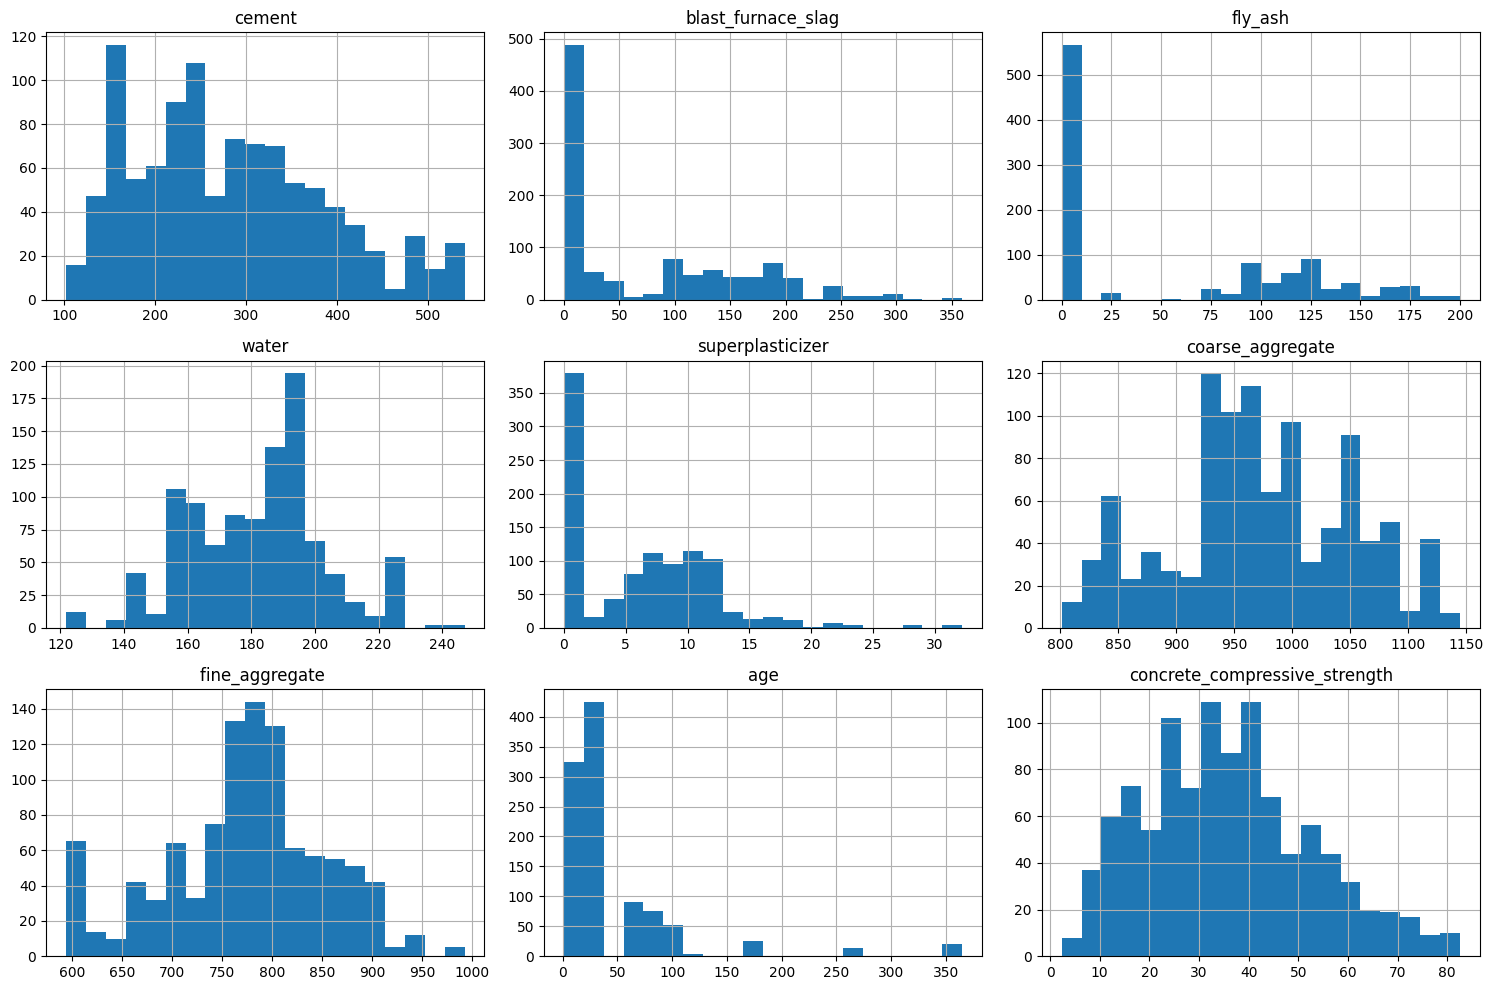

In [ ]:
#각 컬럼의 데이터분포를 확인

import seaborn as sns

# 히스토그램으로 데이터 분포 확인
df.hist(bins=20, figsize=(15,10))
plt.tight_layout()
plt.show()

### concrete_compressive_strength과 다른 컬럼들 간의 관계를 확인합니다.


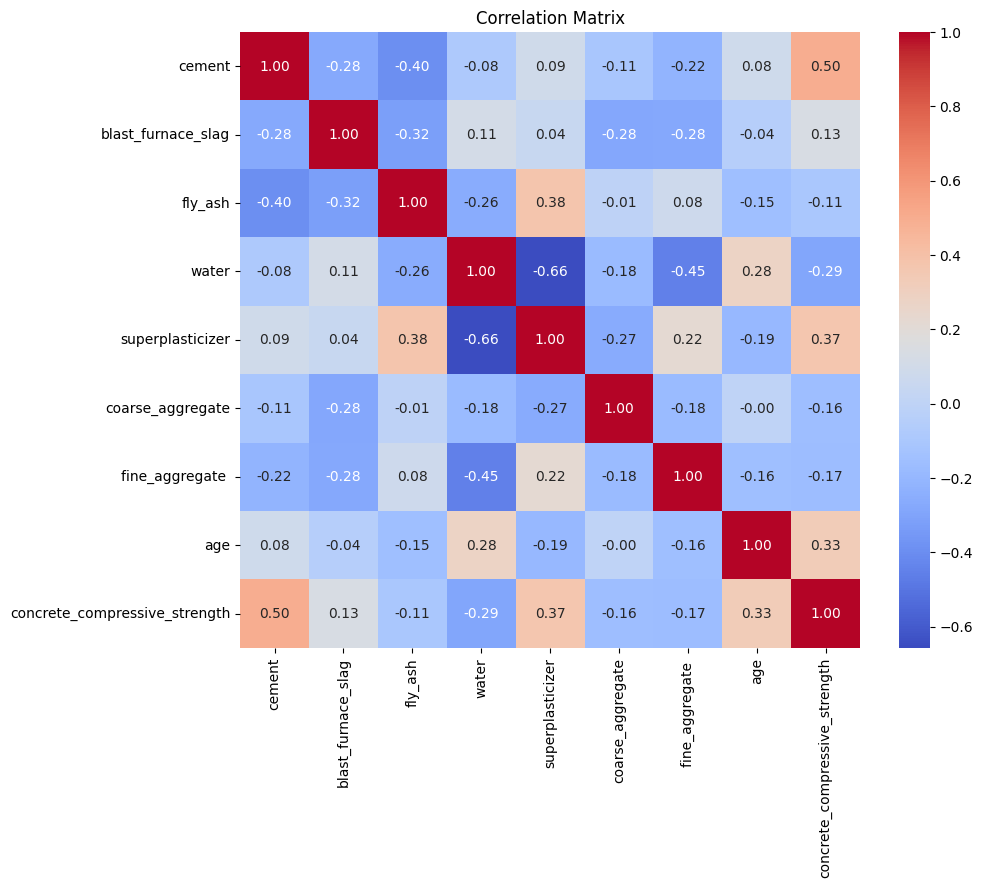

In [ ]:
# 상관 행렬 및 히트맵
correlation = df.corr()

plt.figure(figsize=(10,8))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

##### 3-2. 물, 시멘트, 압축강도의 관계를 산점도로 시각화

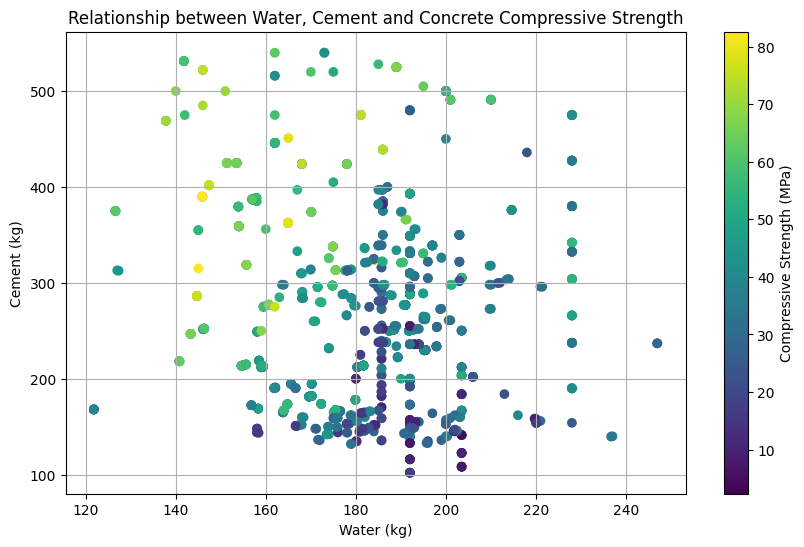

In [ ]:
plt.figure(figsize=(10,6))
scatter = plt.scatter(df['water'], df['cement'],c = df['concrete_compressive_strength'], cmap='viridis')
plt.colorbar(scatter, label='Compressive Strength (MPa)')
plt.title('Relationship between Water, Cement and Concrete Compressive Strength')
plt.xlabel('Water (kg)')
plt.ylabel('Cement (kg)')
plt.grid(True)
plt.show()

##물(Water)과 시멘트(Cement)의 양이 압축 강도(Concrete Compressive Strength)에 미치는 영향:

시멘트의 양이 증가할수록 일반적으로 압축 강도(컬러바의 값)가 높아지는 경향을 보입니다. 이는 시멘트가 콘크리트의 강도에 중요한 역할을 한다는 것을 반영합니다.
물의 양은 특정 수준을 넘어 증가하면 압축 강도에 부정적인 영향을 미치는 것으로 보입니다. 이는 물이 너무 많으면 시멘트와의 비율이 깨지고, 콘크리트가 약해질 수 있기 때문입니다.

###데이터 분포: <br>
물과 시멘트의 조합이 다양한 분포를 이루고 있으며, 특정 범위(예: 물 180 - 220kg, 시멘트 200 - 400kg)에서 데이터가 밀집되어 있는 것이 보입니다. 이는 실험에서 주로 이 범위에서 데이터를 수집했을 가능성을 시사합니다.

###압축 강도의 범위: <br>
압축 강도는 약 10MPa에서 80MPa까지 분포하며, 높은 강도를 가진 데이터는 상대적으로 적습니다. 시멘트의 양이 많아지고 물의 양이 적절히 유지될 때 강도가 높은 경향을 보입니다.

###비선형 관계 가능성:<br>
물과 시멘트의 양이 강도에 미치는 영향이 단순히 선형적이지 않을 가능성이 높습니다. 물과 시멘트의 최적 비율이 중요하며, 이를 더 정량적으로 분석할 필요가 있습니다.

# 물과 시멘트의 양이 압축 강도에 미치는 영향:

##### 3-3. 각 컬럼들의 분포를 시각화

In [ ]:
# 위에 했습니다.

##### 3-4. 압축강도와 상관관계가 높은 3개 컬럼을 산점도로 시각화

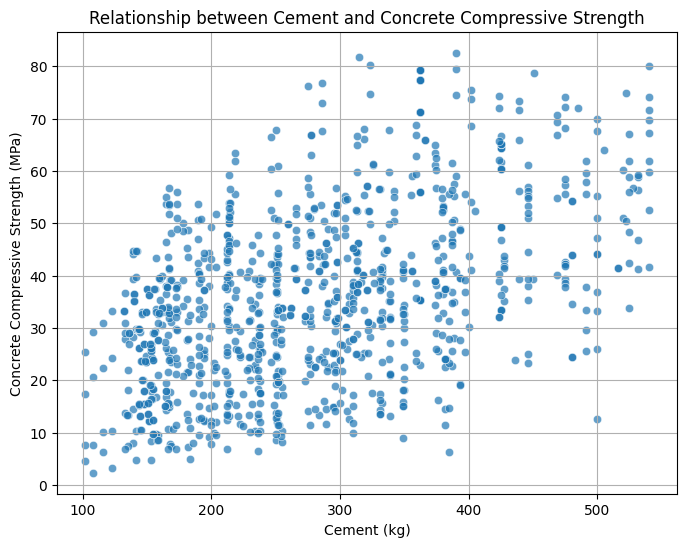

In [ ]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='cement', y='concrete_compressive_strength', alpha=0.7)
plt.title('Relationship between Cement and Concrete Compressive Strength')
plt.xlabel('Cement (kg)')
plt.ylabel('Concrete Compressive Strength (MPa)')
plt.grid(True)
plt.show()

1. 양의 상관 관계<br>
데이터는 시멘트의 양이 많아질수록 압축 강도가 전반적으로 증가하는 경향을 보여줍니다.
특히, 시멘트가 약 300~500kg 범위에서 압축 강도가 상대적으로 높은 값을 나타내는 점이 많습니다.

2. 데이터 분포<br>
데이터는 시멘트의 양이 100~500kg 범위에 고르게 분포되어 있습니다.
낮은 시멘트 양(100200kg)에서는 압축 강도가 1030MPa 정도로 제한된 범위를 갖는 반면, 높은 시멘트 양(400500kg)에서는 4080MPa의 높은 강도를 갖는 경우가 많습니다.

3. 변동성<br>
동일한 시멘트 양에서도 압축 강도가 크게 달라지는 경우가 있습니다. 이는 압축 강도가 시멘트 양 외의 다른 변수(예: 물, 플라이 애쉬 등)의 영향을 받는다는 것을 의미합니다.

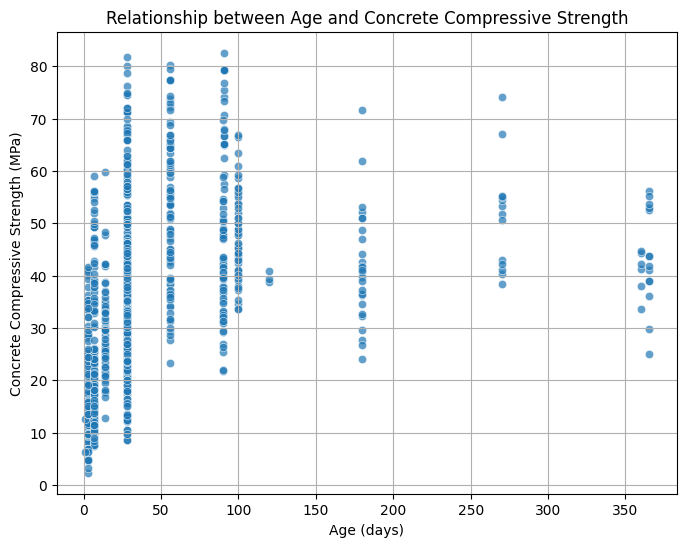

In [ ]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='age', y='concrete_compressive_strength', alpha=0.7)
plt.title('Relationship between Age and Concrete Compressive Strength')
plt.xlabel('Age (days)')
plt.ylabel('Concrete Compressive Strength (MPa)')
plt.grid(True)
plt.show()

1. 양의 상관 관계<br>
전반적으로 경과 시간이 길어질수록 콘크리트의 압축 강도가 증가하는 경향이 나타납니다.
이는 콘크리트가 시간이 지남에 따라 강도를 더 발휘하는 특성을 반영합니다. 특히, 초기 0~50일 사이에 강도가 급격히 증가하는 패턴이 보입니다.

2. 데이터 분포<br>
데이터는 특정 경과 시간(예: 7일, 28일, 56일, 90일, 365일 등)에 많이 집중되어 있습니다. 이는 실험 데이터가 주요 시간 구간에 맞춰 수집되었을 가능성을 시사합니다.
초기에 0~50일 사이 데이터가 가장 많고, 이후 200일 이상에서는 상대적으로 데이터가 적습니다.

3. 포화 효과<br>
100일 이후부터는 압축 강도가 상대적으로 완만하게 증가하거나 일정 수준에서 포화되는 경향이 보입니다.
이는 일정 시간이 지나면 경화 과정이 완만해지고, 강도가 더 이상 크게 증가하지 않을 수 있음을 나타냅니다.


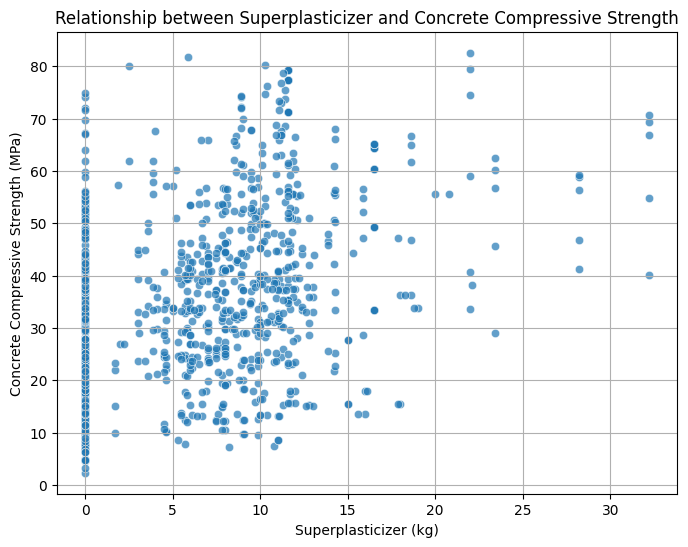

In [ ]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='superplasticizer', y='concrete_compressive_strength', alpha=0.7)
plt.title('Relationship between Superplasticizer and Concrete Compressive Strength')
plt.xlabel('Superplasticizer (kg)')
plt.ylabel('Concrete Compressive Strength (MPa)')
plt.grid(True)
plt.show()

1. 슈퍼플라스티사이저의 사용 여부<br>
데이터의 일부는 슈퍼플라스티사이저가 0인 경우로, 해당 데이터가 왼쪽에 수직으로 분포하고 있습니다. 이는 슈퍼플라스티사이저를 사용하지 않은 콘크리트의 강도가 주로 10~60MPa 범위에 있음을 보여줍니다.

2. 슈퍼플라스티사이저 사용량 증가와 강도<br>
슈퍼플라스티사이저의 양이 증가함에 따라 강도가 높아지는 경향이 일부 보입니다. 특히, 0~10kg 구간에서 강도가 분포적으로 더 높은 값을 나타내는 경우가 많습니다.
하지만 15kg 이상의 구간에서는 데이터가 희소하며, 강도가 명확히 증가하거나 감소하지 않는 혼합된 결과를 보입니다.

3. 데이터 분포<br>
대부분의 데이터가 슈퍼플라스티사이저 0~10kg 구간에 밀집되어 있으며, 이는 이 범위에서 실험이 주로 수행되었음을 시사합니다.
슈퍼플라스티사이저가 20kg 이상인 경우 데이터가 매우 적어, 이 구간의 신뢰도를 높이기 위해 추가 데이터가 필요할 수 있습니다.

#### 4. 모델링을 위한 데이터 전처리를 진행합니다.   
- X, y 분리   

- train, test 분리   

- 스케일링   

- 5-fold 적용   

    - kfold의 random_state는 42로 고정, shuffle은 True로 설정   
    


In [ ]:
# X,y 분리
X = df.drop(columns=['concrete_compressive_strength']) #예측변수 제거
y = df['concrete_compressive_strength'] # 예측대상

In [ ]:
# train, test 분리
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [ ]:
# 스케일링 : StandScaler()를 사용해 데이터 표준
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

In [ ]:
# 5-fold
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

In [ ]:
# 데이터 확인
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)
print("Scaler mean:", scaler.mean_)
print("Number of splits:", kfold.get_n_splits())

X_train shape: (824, 8)
X_test shape: (206, 8)
y_train shape: (824,)
y_test shape: (206,)
Scaler mean: [272.3961165   71.99271845  58.29854369 180.64805825   6.36747573
 970.40048544 779.47281553  49.66504854]
Number of splits: 5


#### 5. 모델 구현 및 성능을 테스트합니다.

- 최대한의 성능을 스스로 구현해보고 성능을 테스트해봅니다.   

- 모델의 random_state는 42로 고정   

- 평가지표는 MAE, MSE, R2 를 사용합니다

In [ ]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import KFold, GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# KFold 설정
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

# Linear Regression 모델 생성 및 교차 검증
linear_mae, linear_mse, linear_r2 = [], [], []
linear_model = LinearRegression()

for train_index, val_index in kfold.split(X_train_scaled):
    X_kfold_train, X_kfold_val = X_train_scaled[train_index], X_train_scaled[val_index]
    y_kfold_train, y_kfold_val = y_train.iloc[train_index], y_train.iloc[val_index]

    linear_model.fit(X_kfold_train, y_kfold_train)
    y_pred = linear_model.predict(X_kfold_val)

    linear_mae.append(mean_absolute_error(y_kfold_val, y_pred))
    linear_mse.append(mean_squared_error(y_kfold_val, y_pred))
    linear_r2.append(r2_score(y_kfold_val, y_pred))

linear_results = {
    "MAE": np.mean(linear_mae),
    "MSE": np.mean(linear_mse),
    "R2": np.mean(linear_r2),
    "MAE_STD": np.std(linear_mae),
    "MSE_STD": np.std(linear_mse),
    "R2_STD": np.std(linear_r2),
}

# Decision Tree 모델 생성 및 교차 검증
dt_mae, dt_mse, dt_r2 = [], [], []
dt_model = DecisionTreeRegressor(random_state=42)

for train_index, val_index in kfold.split(X_train_scaled):
    X_kfold_train, X_kfold_val = X_train_scaled[train_index], X_train_scaled[val_index]
    y_kfold_train, y_kfold_val = y_train.iloc[train_index], y_train.iloc[val_index]

    dt_model.fit(X_kfold_train, y_kfold_train)
    y_pred = dt_model.predict(X_kfold_val)

    dt_mae.append(mean_absolute_error(y_kfold_val, y_pred))
    dt_mse.append(mean_squared_error(y_kfold_val, y_pred))
    dt_r2.append(r2_score(y_kfold_val, y_pred))

dt_results = {
    "MAE": np.mean(dt_mae),
    "MSE": np.mean(dt_mse),
    "R2": np.mean(dt_r2),
    "MAE_STD": np.std(dt_mae),
    "MSE_STD": np.std(dt_mse),
    "R2_STD": np.std(dt_r2),
}

# Grid Search를 통한 Decision Tree 최적화 및 교차 검증
param_grid = {
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'random_state': [42]
}

grid_search = GridSearchCV(
    estimator=DecisionTreeRegressor(),
    param_grid=param_grid,
    scoring='neg_mean_squared_error',
    cv=5,
    n_jobs=-1,
    verbose=1
)

grid_search.fit(X_train_scaled, y_train)
best_model = grid_search.best_estimator_

grid_results = {
    "Best CV MSE": -grid_search.best_score_,
    "Best Parameters": grid_search.best_params_,
}

# 테스트 데이터 평가
test_results = {}
for model_name, model in zip(
    ["Linear Regression", "Decision Tree", "Optimized Decision Tree"],
    [linear_model, dt_model, best_model],
):
    y_test_pred = model.predict(X_test_scaled)
    test_results[model_name] = {
        "Test MAE": mean_absolute_error(y_test, y_test_pred),
        "Test MSE": mean_squared_error(y_test, y_test_pred),
        "Test R2": r2_score(y_test, y_test_pred),
    }

# 출력 결과
print("교차 검증 결과 (Linear Regression):", linear_results)
print("교차 검증 결과 (Decision Tree):", dt_results)
print("Grid Search 결과 (Optimized Decision Tree):", grid_results)

print("\n테스트 데이터 성능 비교:")
for model_name, metrics in test_results.items():
    print(f"{model_name}:")
    for metric, value in metrics.items():
        print(f"  {metric}: {value:.4f}")


Fitting 5 folds for each of 36 candidates, totalling 180 fits
교차 검증 결과 (Linear Regression): {'MAE': 8.421617574906048, 'MSE': 113.16221189419227, 'R2': 0.5971352686753142, 'MAE_STD': 0.4063500642902831, 'MSE_STD': 10.286979521420717, 'R2_STD': 0.047330207579311216}
교차 검증 결과 (Decision Tree): {'MAE': 4.638912244395171, 'MSE': 48.54566644362323, 'R2': 0.8279264905258834, 'MAE_STD': 0.6766029017486054, 'MSE_STD': 13.897284916832355, 'R2_STD': 0.04816660121714701}
Grid Search 결과 (Optimized Decision Tree): {'Best CV MSE': 51.36862828123717, 'Best Parameters': {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 2, 'random_state': 42}}

테스트 데이터 성능 비교:
Linear Regression:
  Test MAE: 7.7932
  Test MSE: 97.0561
  Test R2: 0.6233
Decision Tree:
  Test MAE: 6.6964
  Test MSE: 86.7066
  Test R2: 0.6635
Optimized Decision Tree:
  Test MAE: 6.0240
  Test MSE: 71.8552
  Test R2: 0.7211


- Linear Regression 모델은 MAE 7.79, MSE 97.05, R2 0.62으로 가장 낮은 성능을 보였습니다.     

- Decision Tree 모델은 MAE 6.69, MSE 86.70, R2 0.66으로 더 나은 성능을 보였습니다.     

- Grid Search를 사용한 Decision Tree 모델은 MAE 6.02, MSE 71.85, R2 0.72으로 성능이 약간 떨어졌습니다.     

- Decision Tree 모델이 가장 좋은 성능을 보였으며, 하이퍼파라미터 튜닝이 항상 성능을 향상시키는 것은 아님을 알 수 있습니다.     

- 최종 결론으로, Decision Tree 모델이 이 데이터셋에 대해 가장 적합한 모델로 판단되며, 하이퍼파라미터 튜닝은 데이터셋의 특성에 따라 신중히 적용해야 합니다.     
